# Capstone Project AQI to the Death (Sprint 2)
#### Nattawaree Piyarat

Goal for Sprint 2
1. EDA
2. Prepare dataset for Modeling

Import necessary libraries.

Load dataset and perform EDA.

In [1]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

## TODO - DTALE - DATA Visulization library

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm #used for plotting

In [2]:
df = pd.read_csv('Research Dataset/who_ambient_air_quality.csv')

In [3]:
df.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,3_Sear,IND,India,Chennai,2018,version 2022,NaN,30.0,NaN,NaN,91.0,NaN,NaN,"U.S. Department of State, United States Enviro...",https://www.airnow.gov/index.cfm?action=airnow...,9890427.0,NaN,13.087840,80.278470,1
1,3_Sear,IND,India,Solapur,2016,"version 2022, version 2018",NaN,39.0,NaN,NaN,99.0,NaN,NaN,"Central Pollution Control Board India, Environ...",NaN,985568.0,NaN,17.659919,75.906391,1
2,3_Sear,IND,India,Chennai,2019,version 2022,NaN,39.0,NaN,NaN,85.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",9890427.0,NaN,13.087840,80.278470,1
3,3_Sear,IND,India,Hyderabad,2019,version 2022,NaN,42.0,NaN,NaN,87.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",8943523.0,NaN,17.384050,78.456360,1
4,3_Sear,IND,India,Pune,2017,version 2022,NaN,43.0,NaN,NaN,NaN,NaN,NaN,"Central Pollution Control Board India, Environ...",http://www.cpcb.gov.in/CAAQM/,5727530.0,NaN,18.505320,73.823839,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41364 entries, 2018 to 2010
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          41364 non-null  object 
 1   iso3                41364 non-null  object 
 2   country_name        41364 non-null  object 
 3   city                41252 non-null  object 
 4   year                41364 non-null  int64  
 5   version             41219 non-null  object 
 6   pm10_concentration  28177 non-null  float64
 7   pm25_concentration  21566 non-null  float64
 8   no2_concentration   26704 non-null  float64
 9   pm10_tempcov        21344 non-null  float64
 10  pm25_tempcov        16114 non-null  float64
 11  no2_tempcov         22991 non-null  float64
 12  type_of_stations    29459 non-null  object 
 13  reference           40538 non-null  object 
 14  web_link            31983 non-null  object 
 15  population          17161 non-null  float64
 16  populat

In [63]:
# check null value percentage
df.isna().mean()*100

who_region              0.000000
iso3                    0.000000
country_name            0.000000
city                    0.270767
year                    0.000000
version                 0.350546
pm10_concentration     31.880379
pm25_concentration     47.862876
no2_concentration      35.441447
pm10_tempcov           48.399575
pm25_tempcov           61.043419
no2_tempcov            44.417851
type_of_stations       28.781066
reference               1.996906
web_link               22.679141
population             58.512233
population_source     100.000000
latitude                0.601973
longitude               0.609225
who_ms                  0.000000
dtype: float64

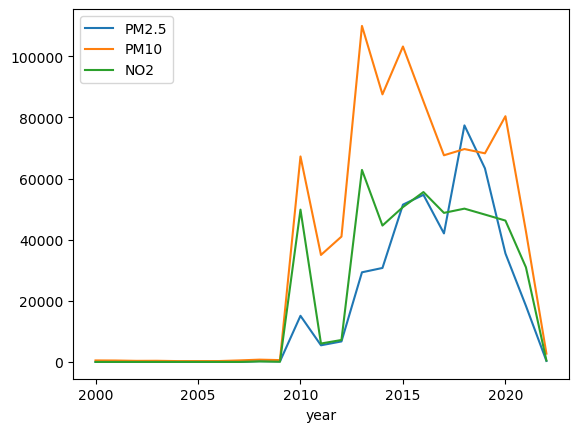

In [5]:
df.groupby(df.year)['pm25_concentration'].sum().plot(kind='line',label='PM2.5')
df.groupby(df.year)['pm10_concentration'].sum().plot(kind='line', label='PM10')
df.groupby(df.year)['no2_concentration'].sum().plot(kind='line', label='NO2')
plt.legend(loc="upper left")
plt.show()

Since there are no data of PM10, PM2.5, and NO2 before year 2009. So those data should remove.\
And year 2021 -2022 impact by Pandemics so they should remove too

In [6]:
 # Delete all rows with column 'year' < 2009
df.drop(df[df.year < 2009].index, inplace=True)
df.drop(df[df.year >= 2021].index, inplace=True)
df.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms
0,3_Sear,IND,India,Chennai,2018,version 2022,NaN,30.0,NaN,NaN,91.0,NaN,NaN,"U.S. Department of State, United States Enviro...",https://www.airnow.gov/index.cfm?action=airnow...,9890427.0,NaN,13.087840,80.278470,1
1,3_Sear,IND,India,Solapur,2016,"version 2022, version 2018",NaN,39.0,NaN,NaN,99.0,NaN,NaN,"Central Pollution Control Board India, Environ...",NaN,985568.0,NaN,17.659919,75.906391,1
2,3_Sear,IND,India,Chennai,2019,version 2022,NaN,39.0,NaN,NaN,85.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",9890427.0,NaN,13.087840,80.278470,1
3,3_Sear,IND,India,Hyderabad,2019,version 2022,NaN,42.0,NaN,NaN,87.0,NaN,NaN,"U.S. Department of State, United States Enviro...","[[[""EPA AirNow DOS"",""http://airnow.gov/index.c...",8943523.0,NaN,17.384050,78.456360,1
4,3_Sear,IND,India,Pune,2017,version 2022,NaN,43.0,NaN,NaN,NaN,NaN,NaN,"Central Pollution Control Board India, Environ...",http://www.cpcb.gov.in/CAAQM/,5727530.0,NaN,18.505320,73.823839,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41339 entries, 0 to 41363
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          41339 non-null  object 
 1   iso3                41339 non-null  object 
 2   country_name        41339 non-null  object 
 3   city                41227 non-null  object 
 4   year                41339 non-null  int64  
 5   version             41194 non-null  object 
 6   pm10_concentration  28152 non-null  float64
 7   pm25_concentration  21561 non-null  float64
 8   no2_concentration   26699 non-null  float64
 9   pm10_tempcov        21339 non-null  float64
 10  pm25_tempcov        16109 non-null  float64
 11  no2_tempcov         22986 non-null  float64
 12  type_of_stations    29434 non-null  object 
 13  reference           40513 non-null  object 
 14  web_link            31958 non-null  object 
 15  population          17136 non-null  float64
 16  populatio

In [7]:
# Drop unnecessory column
df = df.drop(columns=['web_link', 'reference','population_source','pm10_tempcov','pm25_tempcov','no2_tempcov','type_of_stations'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38546 entries, 0 to 41363
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          38546 non-null  object 
 1   iso3                38546 non-null  object 
 2   country_name        38546 non-null  object 
 3   city                38440 non-null  object 
 4   year                38546 non-null  int64  
 5   version             38401 non-null  object 
 6   pm10_concentration  26092 non-null  float64
 7   pm25_concentration  20009 non-null  float64
 8   no2_concentration   24578 non-null  float64
 9   population          16686 non-null  float64
 10  latitude            38299 non-null  float64
 11  longitude           38297 non-null  float64
 12  who_ms              38546 non-null  int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 4.1+ MB


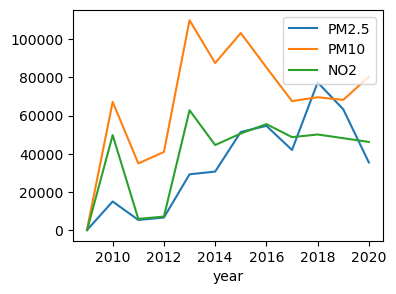

In [8]:
plt.figure(figsize=(4,3))
df.groupby(df.year)['pm25_concentration'].sum().plot(kind='line',label='PM2.5')
df.groupby(df.year)['pm10_concentration'].sum().plot(kind='line', label='PM10')
df.groupby(df.year)['no2_concentration'].sum().plot(kind='line', label='NO2')
plt.legend(loc="upper right")
plt.show()

In [9]:
# Filter only concerned country
country = ["BGD", "BTN", "IDN","IND","LKA","THA"]
df = df[df['iso3'].isin(country)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1669 entries, 0 to 40445
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   who_region          1669 non-null   object 
 1   iso3                1669 non-null   object 
 2   country_name        1669 non-null   object 
 3   city                1664 non-null   object 
 4   year                1669 non-null   int64  
 5   version             1668 non-null   object 
 6   pm10_concentration  1614 non-null   float64
 7   pm25_concentration  371 non-null    float64
 8   no2_concentration   459 non-null    float64
 9   population          1485 non-null   float64
 10  latitude            1554 non-null   float64
 11  longitude           1554 non-null   float64
 12  who_ms              1669 non-null   int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 182.5+ KB


In [96]:
# check null value percentage
df.isna().mean()*100

who_region             0.000000
iso3                   0.000000
country_name           0.000000
city                   0.290360
year                   0.000000
version                0.058072
pm10_concentration     3.193961
pm25_concentration    75.377468
no2_concentration     70.615563
population            11.440186
latitude               6.678281
longitude              6.678281
who_ms                 0.000000
dtype: float64

In [51]:
# Lat and Lon should replace by correct data but now will remove, will be correct in next sprint
df.dropna(subset=['latitude'], inplace=True)

In [11]:
# check null value percentage
df.isna().mean()*100

who_region             0.000000
iso3                   0.000000
country_name           0.000000
city                   0.064350
year                   0.000000
version                0.064350
pm10_concentration     3.539254
pm25_concentration    78.507079
no2_concentration     77.606178
population             4.440154
latitude               0.000000
longitude              0.000000
who_ms                 0.000000
dtype: float64

In [11]:
# Deathrate dataset has no city, so Air dataset should group by country and set mean data to PM25,PM10,NO2
df.groupby(['year','iso3'])['pm10_concentration'].mean()

year  iso3
2010  BGD     173.500000
      BTN      47.000000
      IND     176.750000
2011  BGD     139.250000
      BTN      63.250000
      IDN            NaN
      IND     108.451429
      LKA      64.000000
2012  BGD     168.000000
      BTN     105.250000
      IND     104.836842
2013  BGD     129.250000
      BTN      93.250000
      IND     100.829694
      LKA      64.000000
2014  BGD     152.222222
      BTN     109.750000
      IDN            NaN
      IND      95.484536
      THA      44.807692
2015  BGD     141.500000
      BTN     158.500000
      IDN            NaN
      IND     101.168269
      THA      36.000000
2016  BGD     128.333333
      IDN            NaN
      IND     110.178571
      THA      43.500000
2017  BGD     137.000000
      IDN      23.500000
      IND     147.133333
      LKA            NaN
      THA      39.900000
2018  BGD     146.750000
      IDN      24.750000
      IND     113.692308
      LKA            NaN
2019  BGD            NaN
      IDN     

In [28]:
df_a = df.groupby(['year','iso3']).agg({'pm10_concentration':'mean','pm25_concentration':'mean','no2_concentration':'mean'})
# ['pm10_concentration','pm25_concentration','no2_concentration'].apply(lambda x : x.astype(int).sum())

In [31]:
df_a = df_a.reset_index()
df_a.head()

,year,iso3,pm10_concentration,pm25_concentration,no2_concentration
0,2010,BGD,173.50,92.5,NaN
1,2010,BTN,47.00,NaN,NaN
2,2010,IND,176.75,99.0,20.0
3,2011,BGD,139.25,101.5,NaN
4,2011,BTN,63.25,NaN,NaN


C:\Users\Nattawaree\Documents\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


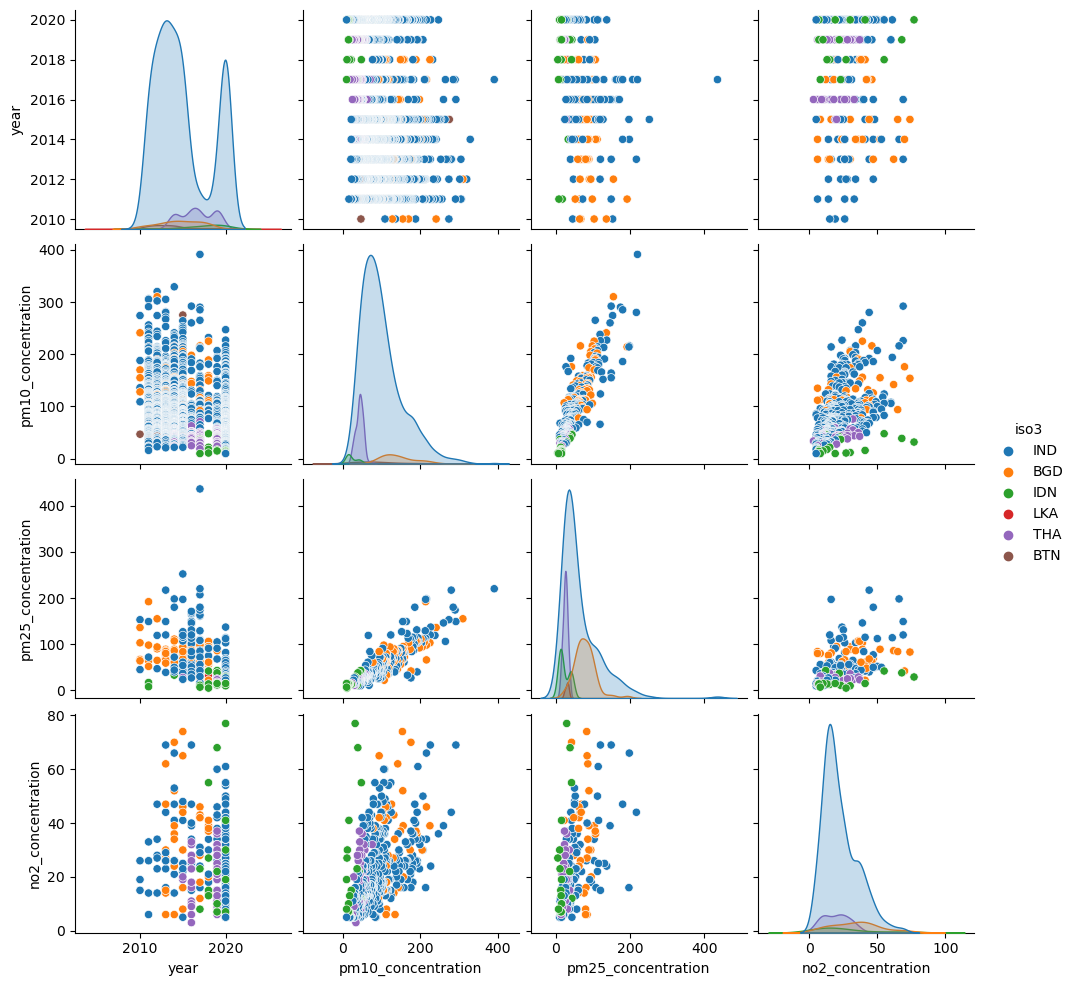

In [12]:
cols_to_plot = ['iso3','year','pm10_concentration','pm25_concentration','no2_concentration']
sns.pairplot(df[cols_to_plot], hue='iso3')

PM10, PM25, and NO2 looks like they have linear relationship

### View data of death rate

In [13]:
df_d = pd.read_csv('Research Dataset/Cause of death/Merge 2016-2019.csv')

In [14]:
# view data
df_d.head()

,Code,Cause,Country,iso3,Year,Sex,Age Group,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population
0,1140,Stroke,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,120674.90,76.38,2676519.0,1694.00
1,1130,Ischaemic heart disease,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,90632.07,57.36,2216751.0,1403.01
2,30,Tuberculosis,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,61224.00,38.75,2971096.0,1880.44
3,490,Neonatal conditions,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,52495.41,33.22,5453862.0,3451.81
4,1180,Chronic obstructive pulmonary disease,Bangladesh,BGD,2016,BTSX,ALLAges,158000000,39330.24,24.89,1037541.0,656.67


In [41]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Code                               3144 non-null   int64  
 1   Cause                              3144 non-null   object 
 2   Country                            3144 non-null   object 
 3   ISO3                               3144 non-null   object 
 4   Year                               3144 non-null   int64  
 5   Sex                                3144 non-null   object 
 6   Age Group                          3144 non-null   object 
 7   Population                         3144 non-null   int64  
 8   Deaths                             3144 non-null   float64
 9   Death rate per 100 000 population  3144 non-null   float64
 10  DALY                               3144 non-null   float64
 11  DALY rate per 100 000 population   3144 non-null   float

In [15]:
#Check null value
df_d.isna().mean()*100

Code                                 0.0
Cause                                0.0
Country                              0.0
iso3                                 0.0
Year                                 0.0
Sex                                  0.0
Age Group                            0.0
Population                           0.0
Deaths                               0.0
Death rate per 100 000 population    0.0
DALY                                 0.0
DALY rate per 100 000 population     0.0
dtype: float64

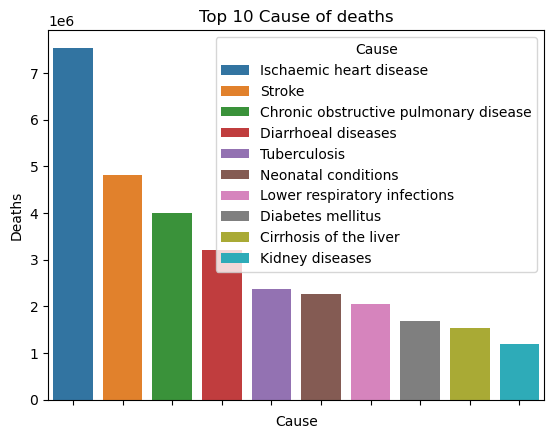

In [16]:
plt.figure()
g = df_d.groupby('Cause', as_index=False)['Deaths'].sum().sort_values(by='Deaths', ascending=False).head(10)
ax = sns.barplot(data=g, x='Cause', y='Deaths', hue='Cause', dodge=False).set(xticklabels=[],title='Top 10 Cause of deaths')

plt.show()


Chronic obstructive pulmonary might came from air quality also Ischaemic heart disease.

In [32]:
# Merge to main dataset

# result = df.merge(df_d, on='iso3', how='inner')
result = df_a.merge(df_d, on='iso3', how='inner')

In [41]:
result.sample(10)

,year,iso3,pm10_concentration,pm25_concentration,no2_concentration,Code,Cause,Country,Year,Sex,Age Group,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population
12922,2018,IND,113.692308,76.000000,25.750000,205,Acute hepatitis E,India,2018,BTSX,ALLAges,1350000000,645.69,0.05,47099.43,3.49
13211,2019,IND,102.333333,64.666667,33.750000,570,Vitamin A deficiency,India,2016,BTSX,ALLAges,1320000000,0.00,0.00,324136.90,24.56
22114,2016,THA,43.500000,NaN,17.916667,1000,Non-migraine headache,Thailand,2016,BTSX,ALLAges,69000000,0.00,0.00,40181.67,58.23
4796,2019,BGD,NaN,86.000000,NaN,1241,Gastritis and duodenitis,Bangladesh,2016,BTSX,ALLAges,158000000,73.59,0.05,43122.52,27.29
4548,2018,BGD,146.750000,71.875000,32.285714,880,Anxiety disorders,Bangladesh,2018,BTSX,ALLAges,161000000,0.00,0.00,491870.40,305.51
7774,2014,BTN,109.750000,NaN,NaN,700,Breast cancer,Bhutan,2019,BTSX,ALLAges,763094,7.92,1.04,316.50,41.48
19015,2013,LKA,64.000000,NaN,NaN,660,Liver cancer,SriLanka,2017,BTSX,ALLAges,21100000,991.75,4.70,24839.14,117.72
12853,2018,IND,113.692308,76.000000,25.750000,1110,Rheumatic heart disease,India,2018,BTSX,ALLAges,1350000000,126371.30,9.36,4527199.00,335.35
12071,2017,IND,147.133333,103.800000,24.600000,680,"Trachea, bronchus, lung cancers",India,2016,BTSX,ALLAges,1320000000,77884.99,5.90,2106471.00,159.58
13017,2018,IND,113.692308,76.000000,25.750000,300,Dengue,India,2019,BTSX,ALLAges,1370000000,17545.72,1.28,951017.10,69.42


In [34]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23580 entries, 0 to 23579
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               23580 non-null  int64  
 1   iso3                               23580 non-null  object 
 2   pm10_concentration                 19388 non-null  float64
 3   pm25_concentration                 17292 non-null  float64
 4   no2_concentration                  12052 non-null  float64
 5   Code                               23580 non-null  int64  
 6   Cause                              23580 non-null  object 
 7   Country                            23580 non-null  object 
 8   Year                               23580 non-null  int64  
 9   Sex                                23580 non-null  object 
 10  Age Group                          23580 non-null  object 
 11  Population                         23580 non-null  int

In [35]:
#Check null value
result.isna().mean()*100

year                                  0.000000
iso3                                  0.000000
pm10_concentration                   17.777778
pm25_concentration                   26.666667
no2_concentration                    48.888889
Code                                  0.000000
Cause                                 0.000000
Country                               0.000000
Year                                  0.000000
Sex                                   0.000000
Age Group                             0.000000
Population                            0.000000
Deaths                                0.000000
Death rate per 100 000 population     0.000000
DALY                                  0.000000
DALY rate per 100 000 population      0.000000
dtype: float64

In [36]:
df_pm25 = result.loc[result['pm25_concentration'].notnull()]
df_pm10 = result.loc[result['pm10_concentration'].notnull()]
df_no2 = result.loc[result['no2_concentration'].notnull()]
# Data show pm10 or pm25 or no2 so split df to 3 dataframe

In [37]:
df_pm25.head()


,year,iso3,pm10_concentration,pm25_concentration,no2_concentration,Code,Cause,Country,Year,Sex,Age Group,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population
0,2010,BGD,173.5,92.5,NaN,1140,Stroke,Bangladesh,2016,BTSX,ALLAges,158000000,120674.90,76.38,2676519.0,1694.00
1,2010,BGD,173.5,92.5,NaN,1130,Ischaemic heart disease,Bangladesh,2016,BTSX,ALLAges,158000000,90632.07,57.36,2216751.0,1403.01
2,2010,BGD,173.5,92.5,NaN,30,Tuberculosis,Bangladesh,2016,BTSX,ALLAges,158000000,61224.00,38.75,2971096.0,1880.44
3,2010,BGD,173.5,92.5,NaN,490,Neonatal conditions,Bangladesh,2016,BTSX,ALLAges,158000000,52495.41,33.22,5453862.0,3451.81
4,2010,BGD,173.5,92.5,NaN,1180,Chronic obstructive pulmonary disease,Bangladesh,2016,BTSX,ALLAges,158000000,39330.24,24.89,1037541.0,656.67


In [23]:
df_pm10.head()


,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,population,...,Cause,Country,Year,Sex,Age Group,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population
18340,3_Sear,IND,India,Bhiwadi,2017,version 2022,391.0,220.0,NaN,104921.0,...,Ischaemic heart disease,India,2016,BTSX,ALLAges,1320000000,1405038.0,106.44,36200000.0,2742.42
18341,3_Sear,IND,India,Bhiwadi,2017,version 2022,391.0,220.0,NaN,104921.0,...,Chronic obstructive pulmonary disease,India,2016,BTSX,ALLAges,1320000000,821768.5,62.26,20300000.0,1537.88
18342,3_Sear,IND,India,Bhiwadi,2017,version 2022,391.0,220.0,NaN,104921.0,...,Diarrhoeal diseases,India,2016,BTSX,ALLAges,1320000000,708811.4,53.70,26200000.0,1984.85
18343,3_Sear,IND,India,Bhiwadi,2017,version 2022,391.0,220.0,NaN,104921.0,...,Stroke,India,2016,BTSX,ALLAges,1320000000,647625.1,49.06,16900000.0,1280.30
18344,3_Sear,IND,India,Bhiwadi,2017,version 2022,391.0,220.0,NaN,104921.0,...,Neonatal conditions,India,2016,BTSX,ALLAges,1320000000,501374.3,37.98,49100000.0,3719.70


In [24]:
df_no2.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,population,...,Cause,Country,Year,Sex,Age Group,Population,Deaths,Death rate per 100 000 population,DALY,DALY rate per 100 000 population
16244,3_Sear,IND,India,Guwahati,2011,version 2022,NaN,NaN,14.0,1042044.0,...,Ischaemic heart disease,India,2016,BTSX,ALLAges,1320000000,1405038.0,106.44,36200000.0,2742.42
16245,3_Sear,IND,India,Guwahati,2011,version 2022,NaN,NaN,14.0,1042044.0,...,Chronic obstructive pulmonary disease,India,2016,BTSX,ALLAges,1320000000,821768.5,62.26,20300000.0,1537.88
16246,3_Sear,IND,India,Guwahati,2011,version 2022,NaN,NaN,14.0,1042044.0,...,Diarrhoeal diseases,India,2016,BTSX,ALLAges,1320000000,708811.4,53.70,26200000.0,1984.85
16247,3_Sear,IND,India,Guwahati,2011,version 2022,NaN,NaN,14.0,1042044.0,...,Stroke,India,2016,BTSX,ALLAges,1320000000,647625.1,49.06,16900000.0,1280.30
16248,3_Sear,IND,India,Guwahati,2011,version 2022,NaN,NaN,14.0,1042044.0,...,Neonatal conditions,India,2016,BTSX,ALLAges,1320000000,501374.3,37.98,49100000.0,3719.70


**Hypothesis Test:**
Null hypothesis is PM2.5 no significant to death rate.
Alternate hypothesis is PM2.5 significat.

<center> $H_0$: PM2.5 no significant. $\;\; vs \;\;$  $H_1$: PM2.5 significant. </center>

In [38]:
# There is some issue about merge dataset so in this sprint will not compare PM2.5 and death rate
df_pm25.groupby(['Cause'])['pm25_concentration'].mean()

Cause
Acute hepatitis A               62.620143
Acute hepatitis B               62.620143
Acute hepatitis C               62.620143
Acute hepatitis E               62.620143
African trypanosomiasis         62.620143
                                  ...    
Upper respiratory infections    62.620143
Urolithiasis                    62.620143
Vitamin A deficiency            62.620143
Whooping cough                  62.620143
Yellow fever                    62.620143
Name: pm25_concentration, Length: 131, dtype: float64

**Hypothesis Test:**
Null hypothesis is PM2.5 no significant to PM10.
Alternate hypothesis is PM2.5 significant to PM10.

<center> $H_0$: PM2.5 no significant. $\;\; vs \;\;$  $H_1$: PM2.5 significant. </center>

In [134]:
two_sample_test = stats.ttest_ind(df_pm25['pm25_concentration'], df_pm10['pm10_concentration']) 

print(two_sample_test)

# result shows pvalue 0 due to data does not proper

TtestResult(statistic=-293.79434632264014, pvalue=0.0, df=1016034.0)


### Next step
1. Update PM10, PM25, NO2 dataset (remove null values)
2. Due to data of Deathrate show only country no city so the PM data have to group by country and use mean of PM10,PM25,NO2
3. The datapoints too less so add more year especially year which high PM value. And maybe add more countries.
4. Modeling and run test for relationship of each independent variables.